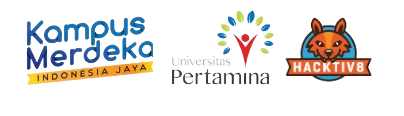

# ROP

Dikumpulkan sebagai salah satu syarat untuk memenuhi tugas Introduction Python for Data Science

**Meet Our Member:** 
1. Andreas Dimas Christanto (PYTN-KS-08-017)
2. Elizabeth Bella Ruth S. (PYTN-KS-08-016)

# Overview

<p style='text-align: justify;'>
    Salah satu upaya yang dapat dilakukan untuk menurunkan biaya pengeboran adalah dengan meningkatkan laju 
penetrasi pengeboran. Laju penetrasi pengeboran atau rate of penetration (ROP) merupakan kecepatan mata bor 
memecah formasi di bawahnya untuk memperdalam lubang sumur dan mencapai kedalaman target. Model 
tradisional (physics-based) model menggunakan korelasi matematis antar parameter pengeboran tanpa 
bergantung pada basis data secara langsung. Persamaan prediksi yang dikembangkan oleh Burgoyne dan Young 
(1974) merupakan metode standar yang digunakan pada industri. Pada Burgoyne and Young Model (BYM) terdapat 
8 parameter pengeboran, diantaranya adalah: 1) formation strength, 2) formation compaction, 3) pore pressure, 4) 
differential pressure, 5) weight-on-bit, 6) rotary drilling speed, 7) drill-bit tooth wear, dan 8) parameter hidrolika 
dari jet pada bit. Selain metode prediksi ROP secara analitik menggunakan BYM, Barbosa dkk. juga merangkum 
aplikasi evaluasi berbasis data seperti machine learning untuk memprediksikan ROP (Barbosa et al., 2019)

<p style='text-align: justify;'>

    ▪ FORMATION, merupakan nama formasi batuan yang ditembus pada kedalaman tertentu
    ▪ TMD, merupakan true measured depth (meter)
    ▪ TVD, merupakan true vertical depth (meter)
    ▪ ROP, merupakan rate of penetration atau laju penetrasi (meter/jam)
    ▪ WOB, merupakan weight on bit (ton)
    ▪ FR, merupakan laju alir lumpur (gallon/menit)
    ▪ SPP, merupakan stand-pipe pressure (psi)
    ▪ RPM, merupakan angular speed dari rotasi drill string (rpm)
    ▪ TQ, merupakan bacaan torque (pound-foot)
    ▪ MW IN, merupakan densitas lumpur yang dipompakan melalui drill string (pound/gallon)
# Objective

Pada kasus ini, tujuan atau objective yang ingin dicapai antara lain sebagai berikut: 
1. Parameter yg penting buat ROP prediction
2. Model yg baik buat nentyin ROP
3. consider itu smur 5 sm 6 itu kararteristik
    
# Import Library 


# Note Upgrade

- [ ] Spearman dipemilihan sumur dipilih yang besar angkanya mutlak (coba cek udh bener belum pemilihannya yg non sumur well 2 blm? 
- [ ] Feature TMD didrop coba hasilnya gimana dan SPP itu mirip gak sih yg ngomongin hidrostatis 
- [ ] Outlier kalo ngga di buang gimana?
- [ ] Pakai standarisasi / scaler disetiap step
- [ ] Kurva learning curve yg n_estimator, max_feature, max_depth ditambahin ke paper
- [ ] Baca two way pdp
- [ ] Misal ada 8 sumur yg 1 sumur dengan hubungan varibel terbagus dan 1 terjelek kemudian di blind dan dibandingin score yg korelasi bagus dan korelasi jelek. (2 sumur blond dan 6 sumur training) 
- [ ] Sb y depth kebalik, sb x nya rop dan bandingin data real dan data prediksi buat pelaporan dan lebih analisa lebih lanjut yg jelek itu formasi yng mana dan formasi mana yg susah untuk diprediksikan dengan pakai visualisasi. 


In [1]:
# Import library pandas dan numpy untuk dataframe
import pandas as pd 
import numpy as np 

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import plotly.express as px

## Import Library untuk analisis
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

pd.options.display.max_rows = None 
pd.options.display.max_columns = None

import pickle

# Data Loading 

In [2]:
data = pd.read_csv('ROP_WELL_DATA.csv')
data.head()


,FORMATION,TMD,WOB,FR,SPP,RPM,TQ,MW IN,ROP
0,SENONIAN ANHYDRITIC,475,0,690.7,2325,63,0.0,10.523,22.0
1,SENONIAN ANHYDRITIC,476,0,718.0,2778,70,0.0,10.985,24.1
2,SENONIAN ANHYDRITIC,477,0,718.5,2774,69,1242.0,10.978,55.2
3,SENONIAN ANHYDRITIC,478,10,703.4,2650,118,3386.0,11.007,41.3
4,SENONIAN ANHYDRITIC,479,10,703.9,2654,106,3923.0,11.010,68.9


In [3]:
data.shape

(10609, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FORMATION  10609 non-null  object 
 1   TMD        10609 non-null  int64  
 2   WOB        10609 non-null  int64  
 3   FR         10609 non-null  float64
 4   SPP        10609 non-null  int64  
 5   RPM        10609 non-null  int64  
 6   TQ         10609 non-null  float64
 7   MW IN      10609 non-null  float64
 8   ROP        10609 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 746.1+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
Lenc = LabelEncoder()

data["FORMATION"] = Lenc.fit_transform(data["FORMATION"])

In [6]:
data.describe()

,FORMATION,TMD,WOB,FR,SPP,RPM,TQ,MW IN,ROP
count,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000
mean,6.058912,1458.926195,13.004242,765.106193,3249.158168,274.563672,8952.593081,10.885173,82.697210
std,3.901069,604.098250,19.321935,124.804193,622.523751,940.674705,3035.585260,0.300237,37.144811
min,0.000000,428.000000,0.000000,0.000000,547.000000,57.000000,0.000000,8.250000,3.100000
25%,3.000000,937.000000,8.000000,747.200000,2822.000000,142.000000,6985.000000,10.856000,56.000000
50%,6.000000,1447.000000,11.000000,782.200000,3409.000000,151.000000,9194.000000,11.000000,78.300000
75%,9.000000,1978.000000,13.000000,823.800000,3744.000000,165.000000,11161.000000,11.000000,105.500000
max,13.000000,2595.000000,160.000000,1741.300000,4416.000000,13851.000000,19822.000000,12.049000,309.100000


In [7]:
#Mengecek missing value 
data.isnull().sum()

FORMATION    0
TMD          0
WOB          0
FR           0
SPP          0
RPM          0
TQ           0
MW IN        0
ROP          0
dtype: int64

<AxesSubplot:>

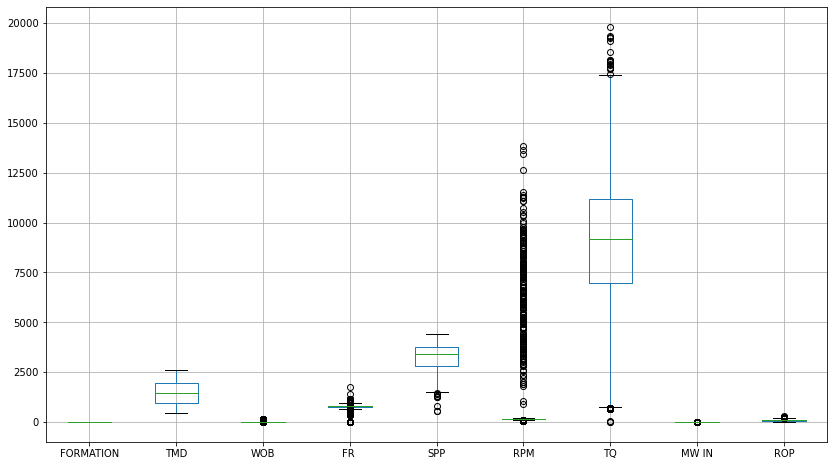

In [8]:
plt.figure(figsize=(14,8))
data.boxplot()

# Data Cleaning 

In [9]:
df1 = pd.read_csv('ROP_NON_W1.csv')
df2 = pd.read_csv('ROP_NON_W2.csv')
df3 = pd.read_csv('ROP_NON_W3.csv')
df4 = pd.read_csv('ROP_NON_W4.csv')
df5 = pd.read_csv('ROP_NON_W5.csv')
df6 = pd.read_csv('ROP_NON_W6.csv')

Keterangan 
- df1 merupakan dataset tanpa sumur 1
- df2 merupakan dataset tanpa sumur 2
- df3 merupakan dataset tanpa sumur 3
- df4 merupakan dataset tanpa sumur 4
- df5 merupakan dataset tanpa sumur 5
- df6 merupakan dataset tanpa sumur 6

In [10]:
Well_1 = pd.read_csv('SUMUR_1.csv')
Well_2 = pd.read_csv('SUMUR_2.csv')
Well_3 = pd.read_csv('SUMUR_3.csv')
Well_4 = pd.read_csv('SUMUR_4.csv')
Well_5 = pd.read_csv('SUMUR_5.csv')
Well_6 = pd.read_csv('SUMUR_6.csv')



In [11]:
df1["FORMATION"] = Lenc.fit_transform(df1["FORMATION"])
df2["FORMATION"] = Lenc.fit_transform(df2["FORMATION"])
df3["FORMATION"] = Lenc.fit_transform(df3["FORMATION"])
df4["FORMATION"] = Lenc.fit_transform(df4["FORMATION"])
df5["FORMATION"] = Lenc.fit_transform(df5["FORMATION"])
df6["FORMATION"] = Lenc.fit_transform(df6["FORMATION"])

In [12]:
df1 = df1.drop(['TMD'],axis=1)
df2 = df2.drop(['TMD'],axis=1)
df3 = df3.drop(['TMD'],axis=1)
df4 = df4.drop(['TMD'],axis=1)
df5 = df5.drop(['TMD'],axis=1)
df6 = df6.drop(['TMD'],axis=1)

ada 6 sumur ya ini !

## Memilih data set yang mana yang paling baik  

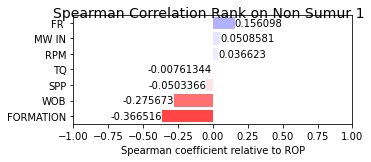

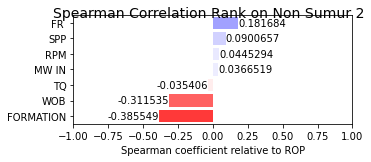

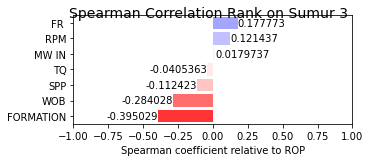

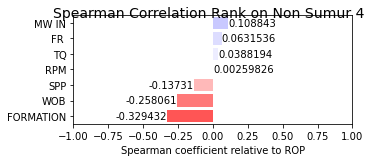

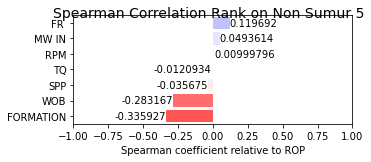

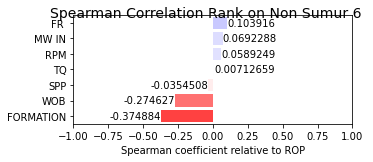

In [13]:
### Sumur 1
rank_spear_1 = df1.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_1.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 1', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_1.values,
    y=rank_spear_1.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur1 = plt.show()

### Sumur 2
rank_spear_2 = df2.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_2.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 2', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_2.values,
    y=rank_spear_2.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur2 = plt.show()

### Sumur 3
rank_spear_3 = df3.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_3.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Sumur 3', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_3.values,
    y=rank_spear_3.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur3 = plt.show()

### Sumur 4
rank_spear_4 = df4.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_4.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 4', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_4.values,
    y=rank_spear_4.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur4 = plt.show()

### Sumur 5
rank_spear_5 = df5.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_5.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 5', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_5.values,
    y=rank_spear_5.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur5 = plt.show()

### Sumur 6
rank_spear_6 = df6.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_6.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 6 ', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_6.values,
    y=rank_spear_6.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur6 = plt.show()



Jadi kita memilih data tanpa sumur 2 (df2) menjadi data set kita kemudian data sumur 2 untuk blind test

In [14]:
df = pd.read_csv('ROP_NON_W2W6.csv')
df = df.drop(['TMD'],axis=1)


In [15]:
blind1 = Well_2
blind2 = Well_6

In [16]:
df["FORMATION"] = Lenc.fit_transform(df["FORMATION"])
df.head()

,FORMATION,WOB,FR,SPP,RPM,TQ,MW IN,ROP
0,9,0,690.7,2325,63,0.0,10.523,22.0
1,9,0,718.0,2778,70,0.0,10.985,24.1
2,9,0,718.5,2774,69,1242.0,10.978,55.2
3,9,10,703.4,2650,118,3386.0,11.007,41.3
4,9,10,703.9,2654,106,3923.0,11.010,68.9


In [17]:
df.tail()

,FORMATION,WOB,FR,SPP,RPM,TQ,MW IN,ROP
5780,5,14,747.4,4053,194,10971.0,10.878,71.1
5781,5,14,747.2,4053,193,10854.0,10.899,84.7
5782,5,15,747.3,4054,191,11444.0,10.862,43.6
5783,5,15,746.6,4056,192,10357.0,10.852,64.1
5784,5,19,747.0,4052,194,9077.0,10.861,15.3


In [18]:
df.describe()

,FORMATION,WOB,FR,SPP,RPM,TQ,MW IN,ROP
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,4.538116,14.553155,766.030164,3241.293863,381.135004,8391.708384,10.878266,80.217027
std,3.215084,25.879488,157.800087,678.126711,1263.997345,3200.309465,0.229294,35.254052
min,0.000000,0.000000,0.000000,547.000000,61.000000,0.000000,8.850000,3.100000
25%,2.000000,8.000000,757.900000,2777.000000,146.000000,6328.000000,10.878000,55.100000
50%,4.000000,10.000000,806.800000,3357.000000,158.000000,8551.000000,11.000000,75.400000
75%,7.000000,12.000000,828.600000,3802.000000,171.000000,10561.000000,11.000000,99.800000
max,11.000000,160.000000,1741.300000,4416.000000,13851.000000,19822.000000,11.208000,309.100000


In [19]:
df.shape

(5785, 8)

In [20]:
df.isnull().sum()

FORMATION    0
WOB          0
FR           0
SPP          0
RPM          0
TQ           0
MW IN        0
ROP          0
dtype: int64

In [21]:
df.corr('spearman')

,FORMATION,WOB,FR,SPP,RPM,TQ,MW IN,ROP
FORMATION,1.000000,0.265487,0.085471,-0.177225,-0.073314,0.052562,-0.337613,-0.372223
WOB,0.265487,1.000000,-0.191190,0.173942,0.225673,0.346432,-0.111538,-0.337551
FR,0.085471,-0.191190,1.000000,-0.050148,-0.224536,0.193250,-0.107528,0.173807
SPP,-0.177225,0.173942,-0.050148,1.000000,0.339575,0.272419,0.336857,0.156171
RPM,-0.073314,0.225673,-0.224536,0.339575,1.000000,0.011750,0.205053,0.035873
TQ,0.052562,0.346432,0.193250,0.272419,0.011750,1.000000,0.104666,-0.032197
MW IN,-0.337613,-0.111538,-0.107528,0.336857,0.205053,0.104666,1.000000,0.054867
ROP,-0.372223,-0.337551,0.173807,0.156171,0.035873,-0.032197,0.054867,1.000000


<AxesSubplot:>

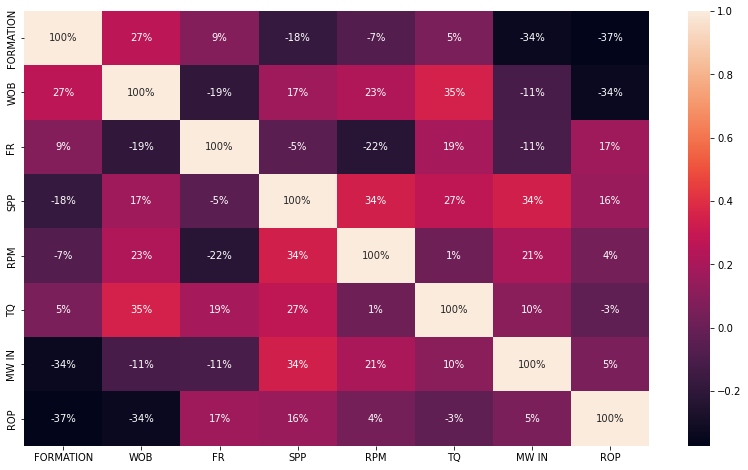

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr('spearman'), annot=True, fmt='.0%')

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\

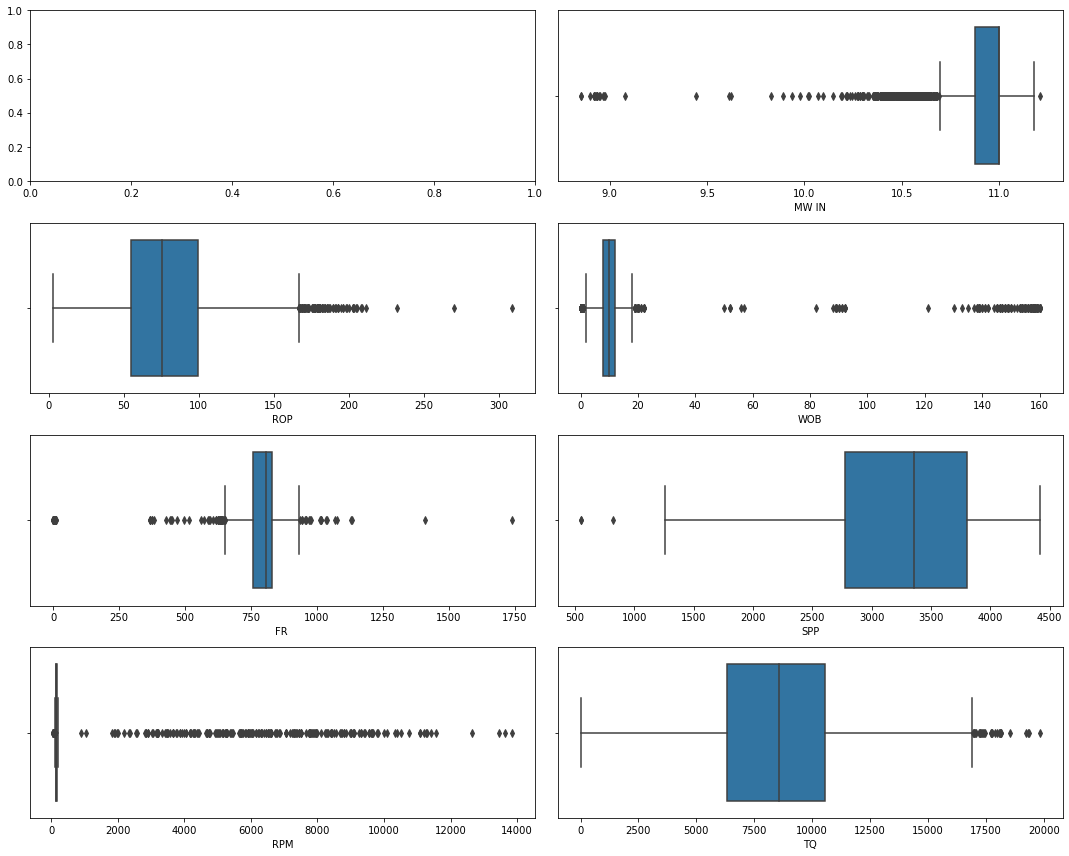

In [23]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
sns.boxplot(df['MW IN'], ax=axes[0,1])
sns.boxplot(df['ROP'], ax=axes[1,0])
sns.boxplot(df['WOB'], ax=axes[1,1])
sns.boxplot(df['FR '], ax=axes[2,0])
sns.boxplot(df['SPP'], ax=axes[2,1])
sns.boxplot(df['RPM'], ax=axes[3,0])
sns.boxplot(df['TQ'], ax=axes[3,1])


plt.tight_layout()
plt.show()

# Lower Limit
q1 = df.quantile(0.25)
# Upper Limit
q3 = df.quantile(0.75)

Iqr = q3-q1
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":q3+1.5*Iqr})
# Lower Limit
low_limit = pd.DataFrame({"Lower Limit":q1-1.5*Iqr})

# apply into datafrlow_limit
data_quartile = pd.concat([up_limit, low_limit], axis=1)
data_quartile

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\

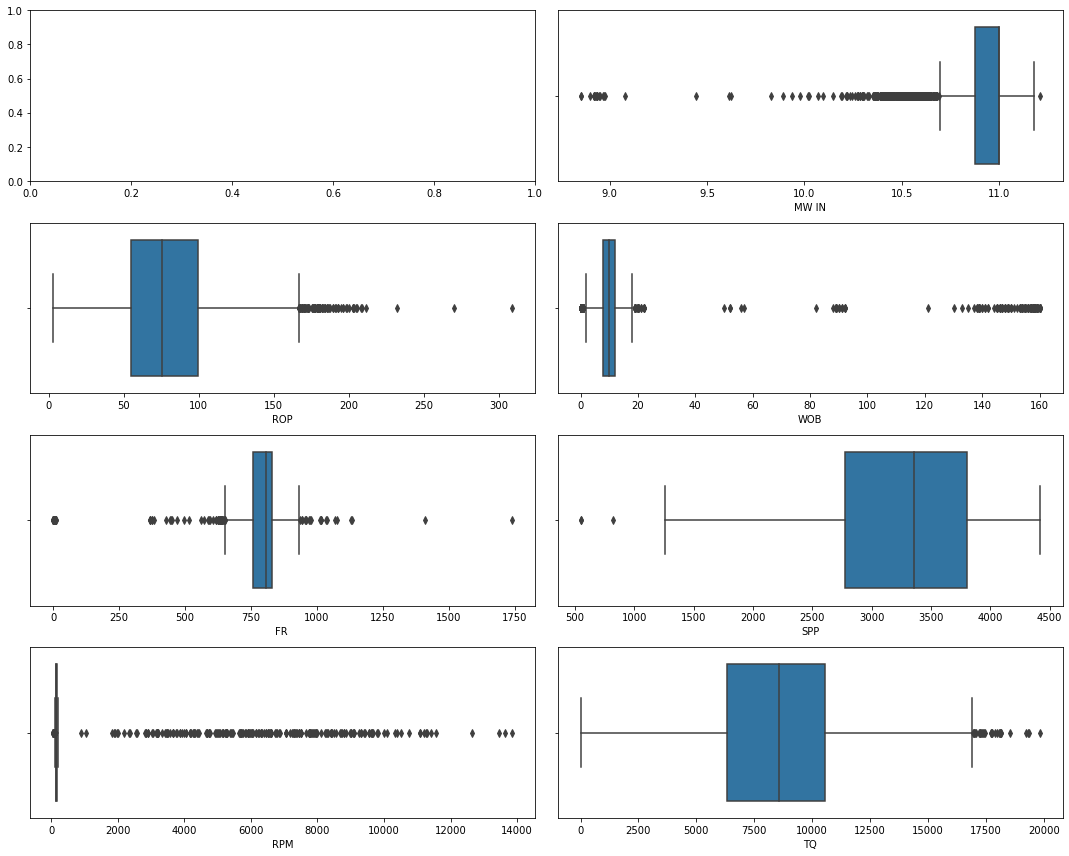

In [24]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

sns.boxplot(df['ROP'], ax=axes[1,0])
sns.boxplot(df['WOB'], ax=axes[1,1])
sns.boxplot(df['FR '], ax=axes[2,0])
sns.boxplot(df['SPP'], ax=axes[2,1])
sns.boxplot(df['RPM'], ax=axes[3,0])
sns.boxplot(df['TQ'], ax=axes[3,1])
sns.boxplot(df['MW IN'], ax=axes[0,1])
plt.tight_layout()
plt.show()

In [25]:
# outlier hilang 

# Exploration Data and Analysis (EDA)
### Explore Data Statistik 


In [26]:
df.describe()

,FORMATION,WOB,FR,SPP,RPM,TQ,MW IN,ROP
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,4.538116,14.553155,766.030164,3241.293863,381.135004,8391.708384,10.878266,80.217027
std,3.215084,25.879488,157.800087,678.126711,1263.997345,3200.309465,0.229294,35.254052
min,0.000000,0.000000,0.000000,547.000000,61.000000,0.000000,8.850000,3.100000
25%,2.000000,8.000000,757.900000,2777.000000,146.000000,6328.000000,10.878000,55.100000
50%,4.000000,10.000000,806.800000,3357.000000,158.000000,8551.000000,11.000000,75.400000
75%,7.000000,12.000000,828.600000,3802.000000,171.000000,10561.000000,11.000000,99.800000
max,11.000000,160.000000,1741.300000,4416.000000,13851.000000,19822.000000,11.208000,309.100000


### Explore Transport Name

In [27]:
#Membuat variabel data formation berisi total data dari kolom formatio 
df_formation = data['FORMATION'].value_counts()
df_formation

3     2239
0     1356
9     1286
8     1013
4      964
11     851
6      750
13     503
12     489
7      411
10     340
5      263
1      120
2       24
Name: FORMATION, dtype: int64

<AxesSubplot:>

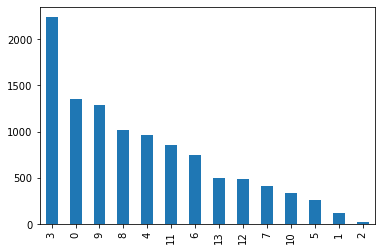

In [28]:
df_formation.plot(kind='bar')

In [29]:
#Membuat variabel data rop berisi total data dari kolom ROP
df_rop = data['ROP'].value_counts()
df_rop

67.4     32
82.2     31
69.5     29
64.5     27
56.3     26
71.0     26
68.1     25
92.1     25
90.5     24
73.0     24
54.7     24
71.4     24
90.4     24
64.4     24
75.3     23
50.3     22
73.1     22
67.8     22
79.7     21
66.9     21
74.7     21
78.1     21
77.3     21
82.0     21
75.4     20
63.2     20
65.6     20
82.3     20
73.5     20
66.2     20
72.5     20
67.3     20
69.4     19
71.1     19
82.1     19
56.4     19
45.2     19
79.8     19
67.7     19
66.3     19
60.2     19
81.4     18
55.0     18
90.6     18
69.2     18
80.2     18
79.3     18
75.1     18
80.1     18
73.3     18
44.8     18
63.9     18
77.1     18
101.4    18
84.2     17
62.8     17
60.0     17
64.3     17
47.6     17
81.5     17
84.5     17
76.6     17
75.2     17
50.1     17
79.1     17
54.4     17
51.2     17
66.1     17
87.9     17
100.5    17
62.5     17
56.1     17
49.9     17
53.2     17
90.2     17
92.9     17
71.2     17
102.3    17
51.4     17
79.2     17
91.3     16
73.2     16
92.7     16
60.1

# Data Preprocessing

 **Feature matrix** `x` \
 **Target matrix** `y`

In [30]:
y = df['ROP']
X = df.drop(['ROP'],axis=1)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FORMATION  5785 non-null   int32  
 1   WOB        5785 non-null   int64  
 2   FR         5785 non-null   float64
 3   SPP        5785 non-null   int64  
 4   RPM        5785 non-null   int64  
 5   TQ         5785 non-null   float64
 6   MW IN      5785 non-null   float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 293.9 KB


In [32]:
X.columns

Index(['FORMATION', 'WOB', 'FR ', 'SPP', 'RPM', 'TQ', 'MW IN'], dtype='object')

<AxesSubplot:>

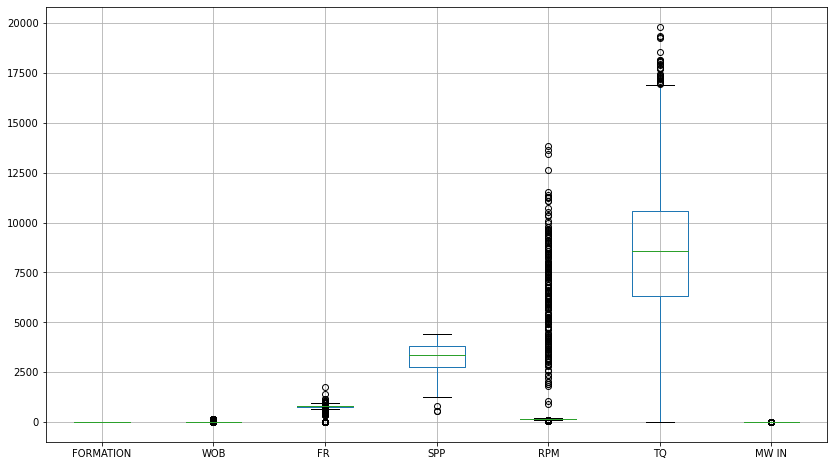

In [33]:
plt.figure(figsize=(14,8))
X.boxplot()

## Data splitting


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
X_test.describe()

,FORMATION,WOB,FR,SPP,RPM,TQ,MW IN
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,4.283247,14.713299,771.408808,3231.818653,414.012090,8483.194646,10.869824
std,3.087408,25.955858,153.563671,685.427859,1404.140094,3107.507759,0.229087
min,0.000000,0.000000,2.000000,1710.000000,81.000000,677.700000,8.919000
25%,2.000000,8.000000,766.000000,2765.000000,146.000000,6579.000000,10.874000
50%,4.000000,10.000000,809.500000,3338.000000,158.000000,8672.000000,11.000000
75%,7.000000,12.000000,829.600000,3808.000000,170.000000,10506.500000,11.000000
max,11.000000,160.000000,1067.300000,4356.000000,11397.000000,19314.000000,11.144000


<AxesSubplot:>

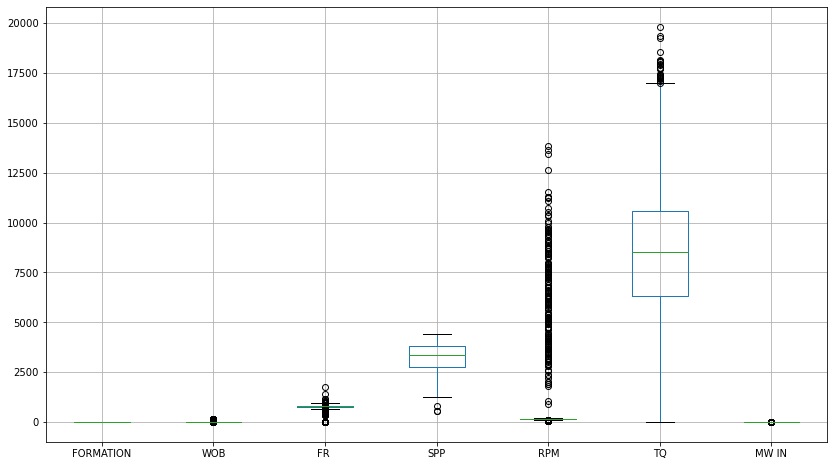

In [36]:
plt.figure(figsize=(14,8))
X_train.boxplot()

### Standardization


In [37]:
from sklearn.preprocessing import StandardScaler

# create StandardScaler instance
scaler = StandardScaler()

# train the scaler to fit X_train
scaler.fit(X_train)

# create transformed X_train_scaled
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

<AxesSubplot:>

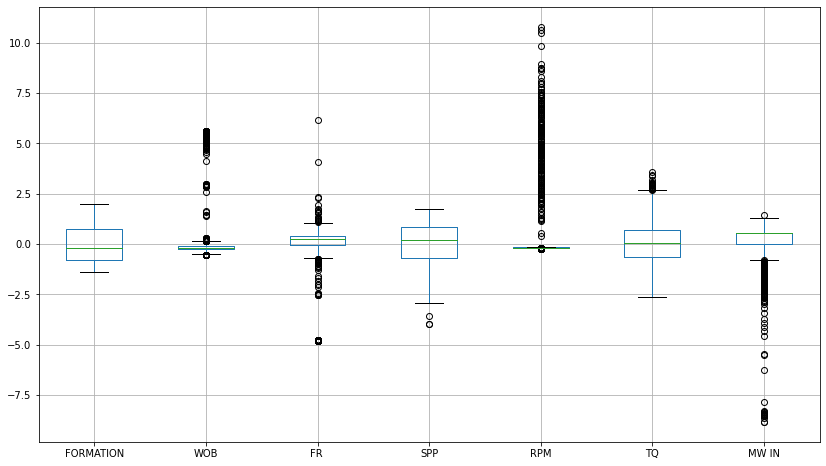

In [38]:
plt.figure(figsize=(14,8))
X_train_scaled.boxplot()

## MODELING 
### RANDOM FOREST REGRESSOR

In [39]:
from sklearn.neural_network import MLPRegressor 

# instantiate model with n_estimators trees
rf = MLPRegressor()

# train the model on the training data
rf.fit(X_train, y_train)

# predict performance using train and test set
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

-0.42233523384574756
-0.500556504626555


In [41]:
#X_train

In [42]:
#from sklearn.metrics import accuracy_score

# score on training set (seen by model during training)
#accuracy_score(y_train, y_pred_train)

In [43]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model with n_estimators trees
rf = MLPRegressor()

# train the model on the training data
rf.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
# predict performance using train and test set
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5206, 7), (579, 7), (5206,), (579,))

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.40596365781825494
0.45184870498386676


In [46]:
#X_test

In [47]:
#X_test

In [48]:
#y_train

In [49]:
#y_test

In [50]:
 #y_pred_test

In [51]:
#y_pred_test

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# create parameter searching grid
param_distributions = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

# create grid seach cross-validation 
random_search = RandomizedSearchCV(MLPRegressor(), param_distributions, scoring='r2', cv=10)

# fit the model at each grid point and keeping track of the scores along the way
random_search.fit(X_train_scaled, y_train)

random_search.best_score_

random_search.best_params_ 

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 50, 50),
 'alpha': 0.0001,
 'activation': 'relu'}

In [53]:
random_search.best_score_

0.6204686533323094

In [54]:
random_search.best_params_ 

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 50, 50),
 'alpha': 0.0001,
 'activation': 'relu'}

### Model Evaluation


#### Learning Curve 

In [55]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.05, 1, 9)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(MLPRegressor(),
                                                                      X_train_scaled,
                                                                      y_train,
                                                                      cv=10,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True)

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

In [56]:
train_sizes

array([ 234,  790, 1346, 1903, 2459, 3015, 3572, 4128, 4685])

In [57]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0, 0.5, 'Score')

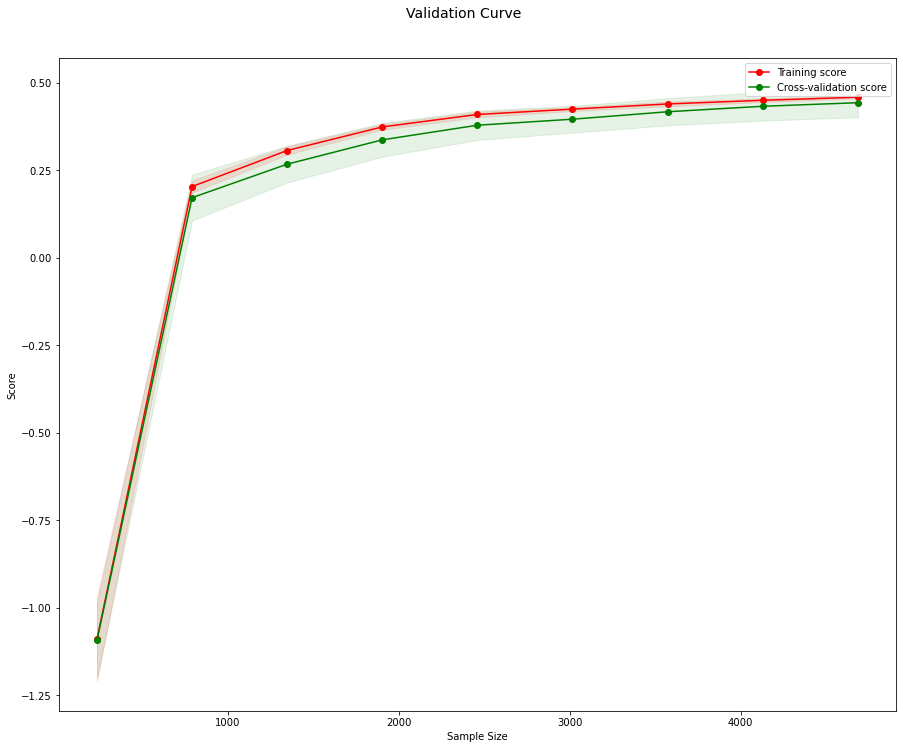

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(15,12))
axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
axes.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1,
                  color="r")
axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes.fill_between(train_sizes,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1,
                  color="g")
axes.legend()
# axes.set_ylim(0.4, 1)
plt.suptitle('Validation Curve', fontsize=14, y=0.94)
axes.set_xlabel('Sample Size')
axes.set_ylabel('Score')

#### Validation Curve

In [59]:
from sklearn.model_selection import validation_curve

param_range=np.arange(10, 50, 10)
param_name='hidden_layer_sizes'
train_scores, valid_scores = validation_curve(MLPRegressor(), 
                                              X_train_scaled, y_train, 
                                              param_name=param_name, 
                                              param_range=param_range, 
                                              cv=10)

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\n

In [60]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

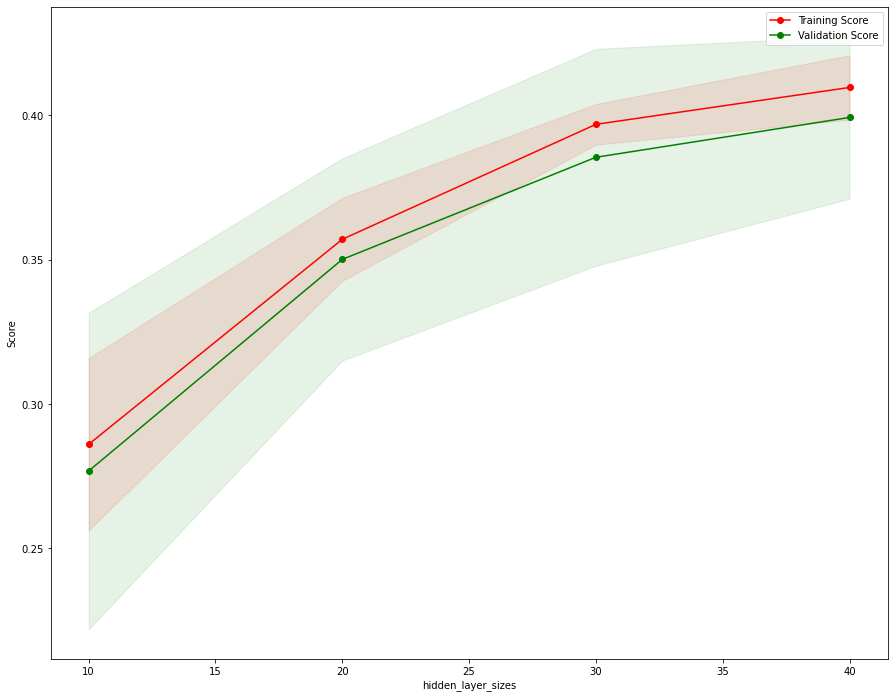

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(15,12))
axes.plot(param_range, train_scores_mean, 'o-', label='Training Score', color='red')
axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1,
                  color="r")
axes.plot(param_range,
          valid_scores_mean,
          'o-',
          label='Validation Score',
          color='green')
axes.fill_between(param_range,
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  alpha=0.1,
                  color="green")
axes.legend()
# axes.set_ylim(0.8, 1)
axes.set_xlabel(param_name)
axes.set_ylabel('Score')

#### Model Tunning 

In [62]:
random_search.best_score_

0.6204686533323094

In [63]:
random_search.best_params_ 

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 50, 50),
 'alpha': 0.0001,
 'activation': 'relu'}

#### Model Evaluation on Dataset Test

In [64]:
# use best estimator as our model
model = random_search.best_estimator_

# training model
model.fit(X_train_scaled, y_train)

# predict model performance
y_pred_test = model.predict(X_test_scaled)

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Text(0.8, 1, 'R² = 0.82')

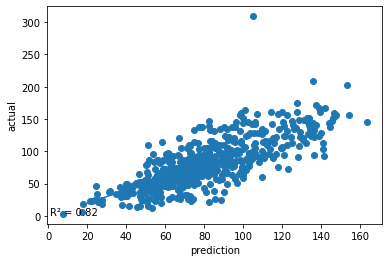

In [65]:
plt.scatter(y_pred_test, y_test)
plt.plot([20, 80], [20, 80])
plt.xlabel('prediction')
plt.ylabel('actual')
r_squared = 0.8245442693362508
plt.text(0.8, 1, 'R\u00B2 = %0.2f' % r_squared)

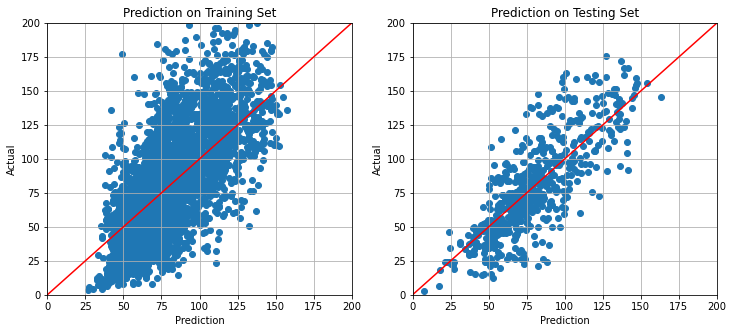

In [66]:
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax_1.set_title('Prediction on Training Set')
ax_1.scatter(y_pred_train, y_train)
ax_1.set_xlim(0,200)
ax_1.set_ylim(0,200)
ax_1.set_xlabel('Prediction')
ax_1.set_ylabel('Actual')
ax_1.plot([0,200], [0,200], color='red')
ax_1.grid()

ax_2.set_title('Prediction on Testing Set')
ax_2.scatter(y_pred_test, y_test)
ax_2.set_xlim(0,200)
ax_2.set_ylim(0,200)
ax_2.set_xlabel('Prediction')
ax_2.set_ylabel('Actual')
ax_2.plot([0,200], [0,200], color='red')
ax_2.grid()

plt.show()

Berdasarkan grafik di atas, hubungan Data Prediksi dan Data Aktual memiliki korelasi yang hampir linear. Hal ini membuktikan bahwa data prediksi hampir mendekati data aktual dan model yang dibuat cukup bagus.

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.611018027726091

In [68]:
from sklearn.metrics import r2_score
r2_score(y_pred_train, y_train)

-0.4612634757712659

### Model Inspection 
#### Permutation Feature Important

In [69]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model,
                           X_test_scaled,
                           y_test,
                           n_repeats=30)

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does no

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does no

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does no

In [70]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

RPM     	2.394 +/- 0.194
WOB     	0.954 +/- 0.064
FORMATION	0.825 +/- 0.080
SPP     	0.466 +/- 0.046
FR      	0.363 +/- 0.031
TQ      	0.287 +/- 0.027
MW IN   	0.166 +/- 0.018


In [71]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([0.82511158, 0.95395368, 0.36255222, 0.46591871, 2.39373048,
       0.28696336, 0.1657602 ])

In [72]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([6, 5, 2, 3, 0, 1, 4], dtype=int64)

[Text(0, 0, 'MW IN'),
 Text(0, 1, 'TQ'),
 Text(0, 2, 'FR '),
 Text(0, 3, 'SPP'),
 Text(0, 4, 'FORMATION'),
 Text(0, 5, 'WOB'),
 Text(0, 6, 'RPM')]

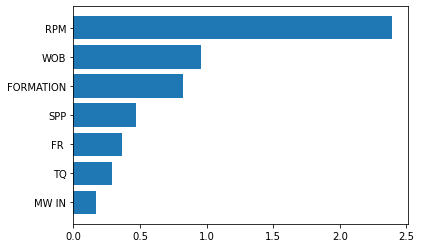

In [73]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

C:\Users\KRISMANTO\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_10476\879060722.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


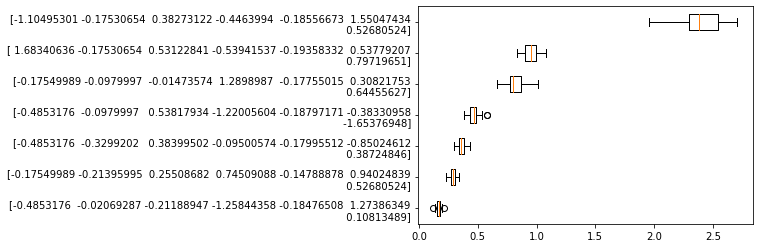

In [74]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test_scaled[sorted_idx])
fig.tight_layout()
plt.show()

#### One-Way Partial Dependence 


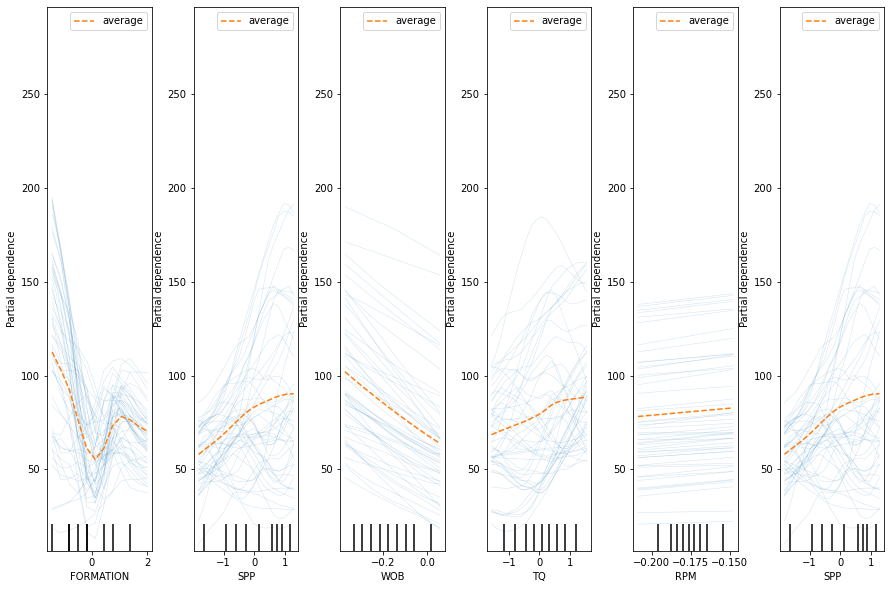

In [86]:
from sklearn.inspection import PartialDependenceDisplay

features = ['FORMATION','SPP', 'WOB', 'TQ','RPM','SPP']
n_features = len(features)
_, ax = plt.subplots(ncols=n_features, figsize=(15,10))
display = PartialDependenceDisplay.from_estimator(model, 
                                                  pd.DataFrame(X_test_scaled, columns=X.columns), 
                                                  features,
                                                  kind="both",
                                                  subsample=50,
                                                  n_jobs=3,
                                                  grid_resolution=20,
                                                  random_state=0,
                                                  ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
                                                  pd_line_kw={"color": "tab:orange", "linestyle": "--"},
                                                  ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.5)

#### Two Way Partial Dependence 


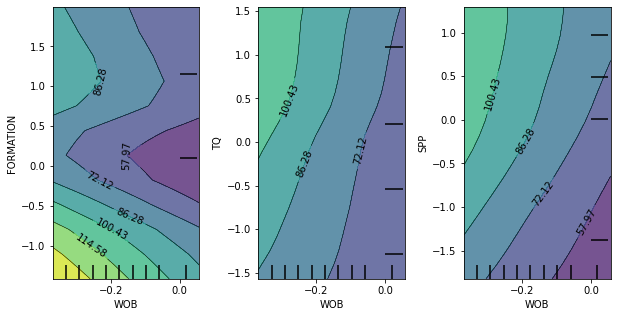

In [87]:
from sklearn.inspection import PartialDependenceDisplay

# ['porosity', 'matrixperm', 'acousticimpedance', 'brittlenessratio', 'toc', 'vitrinitereflectance']
features = [('WOB','FORMATION'),('WOB','TQ'), ('WOB','SPP')]
n_features = len(features)
_, ax = plt.subplots(ncols=n_features, figsize=(10, 5))
display = PartialDependenceDisplay.from_estimator(model, 
                                                  pd.DataFrame(X_test_scaled, columns=X.columns), 
                                                  features,
                                                  kind="average",
                                                  subsample=50,
                                                  n_jobs=3,
                                                  grid_resolution=20,
                                                  random_state=0,
                                                  ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.5)

### Test Model To Blind Data 

In [88]:
test_well = blind1
test_well

,FORMATION,TMD,WOB,FR,SPP,RPM,TQ,MW IN,ROP
0,8,451,2,801.7,2320,100,2412,10.280,37.2
1,8,452,3,801.6,2323,131,3301,10.280,59.7
2,8,453,6,801.5,2327,130,5200,10.280,108.8
3,8,454,5,766.5,1887,136,4080,10.283,128.4
4,8,455,6,757.4,1778,158,6754,10.284,104.9
5,8,456,6,757.6,1781,158,7091,10.283,116.3
6,8,457,7,757.4,1780,164,5795,10.283,83.9
7,8,458,7,757.7,1785,169,5773,10.283,89.5
8,8,459,7,757.8,1784,173,5271,10.283,80.1
9,8,460,8,757.7,1788,177,5819,10.283,74.0


In [89]:
test_well["FORMATION"] = Lenc.fit_transform(test_well["FORMATION"])

In [90]:
test_well

,FORMATION,TMD,WOB,FR,SPP,RPM,TQ,MW IN,ROP
0,8,451,2,801.7,2320,100,2412,10.280,37.2
1,8,452,3,801.6,2323,131,3301,10.280,59.7
2,8,453,6,801.5,2327,130,5200,10.280,108.8
3,8,454,5,766.5,1887,136,4080,10.283,128.4
4,8,455,6,757.4,1778,158,6754,10.284,104.9
5,8,456,6,757.6,1781,158,7091,10.283,116.3
6,8,457,7,757.4,1780,164,5795,10.283,83.9
7,8,458,7,757.7,1785,169,5773,10.283,89.5
8,8,459,7,757.8,1784,173,5271,10.283,80.1
9,8,460,8,757.7,1788,177,5819,10.283,74.0


In [81]:
# Define the test data
x_6 = test_well.drop(['ROP','TMD'], axis=1)
y_6 = test_well['ROP']

X_6_scaled = scaler.transform(x_6)
X_6_scaled = pd.DataFrame(X_6_scaled, columns=X.columns)

y_6_pred = model.predict(X_6_scaled)


from sklearn.metrics import mean_squared_error
print('R2 Score:', r2_score(y_6, y_6_pred))
print('RMSE:', np.mean(mean_squared_error(y_6, y_6_pred)))

R2 Score: -0.15704612157915476
RMSE: 2002.2521130489238


In [82]:
test_well_1 = blind2
blind2.shape

(452, 9)

In [83]:
test_well_1["FORMATION"] = Lenc.fit_transform(test_well_1["FORMATION"])

In [84]:
# Define the test data
x_1 = test_well_1.drop(['ROP','TMD'], axis=1)
y_1 = test_well_1['ROP']

X_1_scaled = scaler.transform(x_1)
X_1_scaled = pd.DataFrame(X_1_scaled, columns=X.columns)

y_1_pred = model.predict(X_1_scaled)

# Plot the Prediction vs Actual

from sklearn.metrics import mean_squared_error
print('R2 Score:', r2_score(y_1, y_1_pred))
print('RMSE:', np.mean(mean_squared_error(y_1, y_1_pred)))

R2 Score: -1.2790469387718169
RMSE: 1227.758206956868


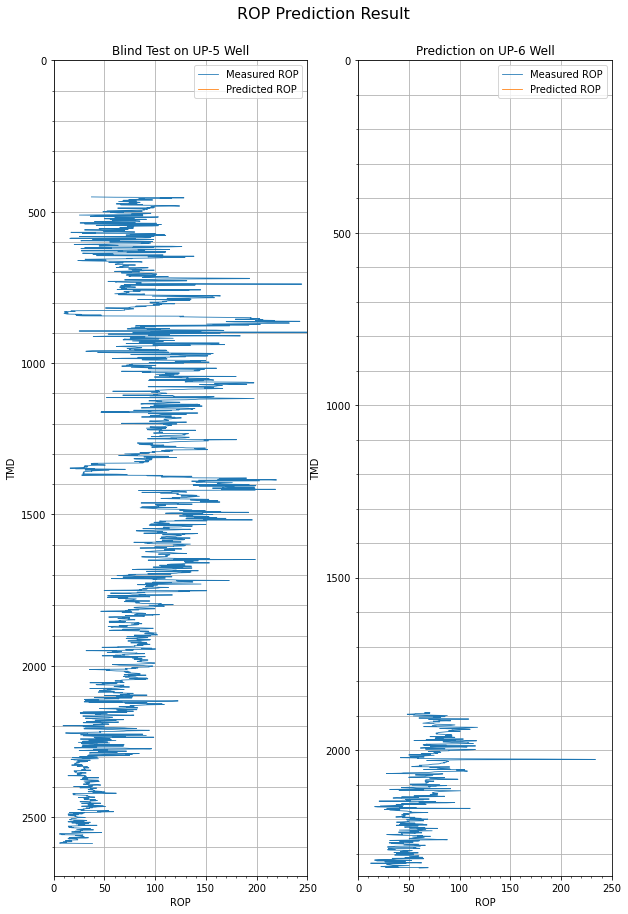

In [85]:
parameters = ['FORMATION', 'WOB', 'FR ', 'SPP', 'RPM', 'TQ', 'MW IN']
result_ROP_1 = model.predict(test_well[parameters])
result_ROP_2 = model.predict(test_well_1[parameters])

fig, [ax_1, ax_2] = plt.subplots(ncols=2, nrows=1, figsize=(10,15))
fig.suptitle('ROP Prediction Result', y=0.93, fontsize=16)

ax_1.set_title('Blind Test on UP-5 Well')
ax_1.plot(test_well['ROP'], test_well['TMD'], label='Measured ROP', linewidth=0.8)
ax_1.plot(result_ROP_1, test_well['TMD'], label='Predicted ROP', linewidth=0.8)
ax_1.set_xlabel('ROP')
ax_1.set_ylabel('TMD')
ax_1.set_ylim(0)
ax_1.invert_yaxis()
ax_1.set_xlim(0, 250)
ax_1.minorticks_on()
ax_1.grid(visible=True, which='both', axis='y')
ax_1.grid(visible=True, which='major', axis='x')
ax_1.legend()

ax_2.set_title('Prediction on UP-6 Well')
ax_2.plot(test_well_1['ROP'], test_well_1['TMD'], label='Measured ROP', linewidth=0.8)
ax_2.plot(result_ROP_2, test_well_1['TMD'], label='Predicted ROP', linewidth=0.8)
ax_2.set_xlabel('ROP')
ax_2.set_ylabel('TMD')
ax_2.set_ylim(0)
ax_2.invert_yaxis()
ax_2.set_xlim(0, 250)
ax_2.minorticks_on()
ax_2.grid(visible=True, which='both', axis='y')
ax_2.grid(visible=True, which='major', axis='x')
ax_2.legend()

plt.show()